In [29]:
from hydroDL import kPath
import pandas as pd
from matplotlib import pyplot as plt
import os

In [41]:
inference_path = os.path.join(kPath.dirVeg, 'inference.csv')
df = pd.read_csv(inference_path)
df

,model,epoch,qual_obs_rmse,qual_obs_corrcoef,qual_obs_coefdet,qual_site_rmse,qual_site_corrcoef,qual_site_coefdet,qual_anomaly_rmse,qual_anomaly_corrcoef,...,poor_anomaly_coefdet,train_obs_rmse,train_obs_corrcoef,train_obs_coefdet,train_site_rmse,train_site_corrcoef,train_site_coefdet,train_anomaly_rmse,train_anomaly_corrcoef,train_anomaly_coefdet
0,500m_no_landsat_do_0.6_nh_24,NaN,29.456231,0.697195,0.485501,24.357762,0.563918,-0.535686,22.923453,0.715938,...,-0.120530,28.686884,0.745121,0.551081,19.611103,0.651019,-0.361261,24.157105,0.758980,0.049947
1,500m_no_landsat_do_0.4_nh_32,NaN,24.306991,0.806493,0.649658,20.735864,0.717463,0.313955,19.717181,0.798674,...,0.428024,19.459543,0.892030,0.793430,13.688261,0.850077,0.602328,17.365448,0.883088,0.677584
2,500m_no_landsat_do_0.6_nh_32,NaN,22.476485,0.837307,0.700438,19.884823,0.740438,0.354061,18.390270,0.827637,...,0.522574,17.282357,0.915819,0.837068,11.953111,0.890003,0.715232,15.636507,0.905868,0.761442
3,500m_no_landsat_do_0.4_nh_24,NaN,26.083926,0.775796,0.596563,21.995630,0.677163,0.192639,20.656156,0.776787,...,0.297977,23.321525,0.838941,0.703302,15.345507,0.806915,0.531203,20.295783,0.834209,0.544290
4,500m_no_landsat_do_0.2_nh_24,NaN,43.012359,0.403678,-0.097025,35.387391,0.268283,-3.196907,27.992751,0.520026,...,-2.258002,43.938749,0.444500,-0.053165,32.879844,0.310886,-3.493064,30.919617,0.546504,-2.130677
5,500m_no_landsat_do_0.2_nh_32,NaN,30.830087,0.701628,0.436389,27.806002,0.551556,0.085880,22.617716,0.734367,...,0.306262,29.484816,0.749453,0.525760,21.709303,0.656973,0.323537,23.537908,0.773300,0.445518
6,all_pick_do_0.2_nh_24,NaN,27.124368,0.758206,0.563736,21.939378,0.672319,0.122369,22.304967,0.744622,...,0.286049,17.357284,0.915399,0.835652,12.739520,0.873924,0.637545,15.393147,0.908831,0.771944
7,all_pick_do_0.6_nh_24,NaN,27.104170,0.755927,0.564385,22.412008,0.649480,-0.045218,21.830615,0.752920,...,0.363832,19.499980,0.892160,0.792571,14.137217,0.847153,0.471121,17.184512,0.884386,0.708775
8,all_pick_do_0.2_nh_32,NaN,26.041433,0.780824,0.597876,22.158465,0.690323,0.319386,21.037563,0.773635,...,0.435308,17.244765,0.916227,0.837776,12.938142,0.869425,0.647872,15.204071,0.910754,0.786154
9,all_pick_do_0.4_nh_24,NaN,26.608274,0.767932,0.580180,21.760715,0.678268,0.139994,21.301169,0.767617,...,0.369859,20.321489,0.881390,0.774725,14.506537,0.834809,0.469851,17.748333,0.875918,0.696633


In [42]:
# df = df[['model', 'qual_obs_corrcoef', 'train_obs_corrcoef']]
df = df[['model', 'qual_obs_coefdet', 'train_obs_coefdet']]
df['hidden_dim_size'] = df['model'].str.split('_').str[-1].astype('int')
df['dropout'] = df['model'].str.split('_').str[-3].astype('float')
df['pick'] = ['cherry'] * 6 + ['all'] * (len(df) - 6)
df

/var/folders/_6/xq5r06kd7qb_g5546y0zvvz80000gn/T/ipykernel_17926/2131047014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hidden_dim_size'] = df['model'].str.split('_').str[-1].astype('int')
/var/folders/_6/xq5r06kd7qb_g5546y0zvvz80000gn/T/ipykernel_17926/2131047014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dropout'] = df['model'].str.split('_').str[-3].astype('float')
/var/folders/_6/xq5r06kd7qb_g5546y0zvvz80000gn/T/ipykernel_17926/2131047014.py:5: SettingWithCopyWarning: 
A value i

,model,qual_obs_coefdet,train_obs_coefdet,hidden_dim_size,dropout,pick
0,500m_no_landsat_do_0.6_nh_24,0.485501,0.551081,24,0.6,cherry
1,500m_no_landsat_do_0.4_nh_32,0.649658,0.793430,32,0.4,cherry
2,500m_no_landsat_do_0.6_nh_32,0.700438,0.837068,32,0.6,cherry
3,500m_no_landsat_do_0.4_nh_24,0.596563,0.703302,24,0.4,cherry
4,500m_no_landsat_do_0.2_nh_24,-0.097025,-0.053165,24,0.2,cherry
5,500m_no_landsat_do_0.2_nh_32,0.436389,0.525760,32,0.2,cherry
6,all_pick_do_0.2_nh_24,0.563736,0.835652,24,0.2,all
7,all_pick_do_0.6_nh_24,0.564385,0.792571,24,0.6,all
8,all_pick_do_0.2_nh_32,0.597876,0.837776,32,0.2,all
9,all_pick_do_0.4_nh_24,0.580180,0.774725,24,0.4,all


In [24]:
def plot(hidden_dim_size):
    sub_df = df[df.hidden_dim_size == hidden_dim_size]
    sub_df = sub_df[sub_df.pick == 'cherry']
    sub_df = sub_df.sort_values('dropout')

    sub_df2 = df[df.hidden_dim_size == hidden_dim_size]
    sub_df2 = sub_df2[sub_df2.pick == 'all']
    sub_df2 = sub_df2.sort_values('dropout')

    plt.plot(sub_df.dropout, sub_df.qual_obs_coefdet, color='green', linestyle='--')
    plt.plot(sub_df.dropout, sub_df.train_obs_coefdet, color='red', linestyle='--')
    plt.plot(sub_df2.dropout, sub_df2.qual_obs_coefdet, color='green')
    plt.plot(sub_df2.dropout, sub_df2.train_obs_coefdet, color='red')
    plt.legend(['cherry pick, test', 'cherry pick, train', 'all pick, test', 'all pick, train'])
    plt.title(f"hidden_dim_size = {hidden_dim_size}")
    plt.xticks([0.2, 0.4, 0.6])
    plt.show()

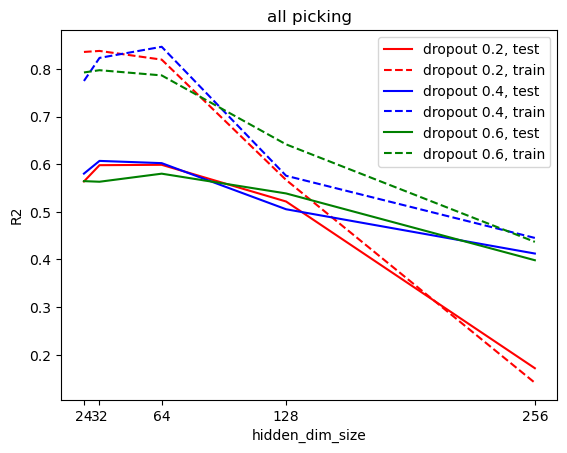

In [43]:
sub_df = df[df.pick == 'all']
sub_df

sub_df1 = sub_df[sub_df.dropout == 0.2]
plt.plot(sub_df1.hidden_dim_size, sub_df1.qual_obs_coefdet, color='red')
plt.plot(sub_df1.hidden_dim_size, sub_df1.train_obs_coefdet, color='red', linestyle='--')

sub_df1 = sub_df[sub_df.dropout == 0.4]
plt.plot(sub_df1.hidden_dim_size, sub_df1.qual_obs_coefdet,color='blue')
plt.plot(sub_df1.hidden_dim_size, sub_df1.train_obs_coefdet,color='blue', linestyle='--')

sub_df1 = sub_df[sub_df.dropout == 0.6]
plt.plot(sub_df1.hidden_dim_size, sub_df1.qual_obs_coefdet,color='green')
plt.plot(sub_df1.hidden_dim_size, sub_df1.train_obs_coefdet,color='green', linestyle='--')

plt.title('all picking')
plt.xlabel('hidden_dim_size')
plt.xticks([24, 32, 64, 128, 256])
plt.ylabel('R2')
plt.legend(['dropout 0.2, test', 'dropout 0.2, train', 'dropout 0.4, test', 'dropout 0.4, train','dropout 0.6, test','dropout 0.6, train'])

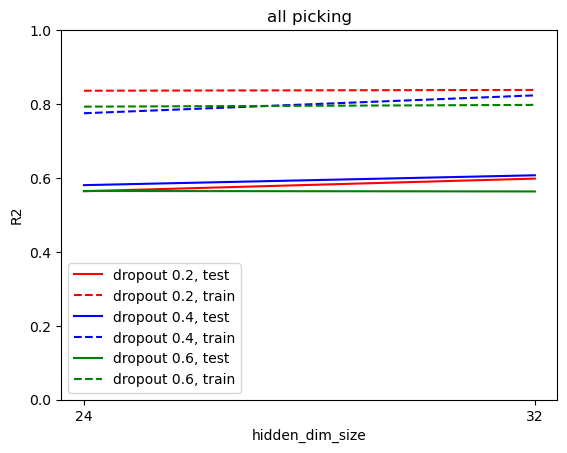

In [44]:
sub_df = df[df.pick == 'all']
sub_df = sub_df[sub_df.hidden_dim_size.isin([24, 32])]

sub_df1 = sub_df[sub_df.dropout == 0.2]
plt.plot(sub_df1.hidden_dim_size, sub_df1.qual_obs_coefdet, color='red')
plt.plot(sub_df1.hidden_dim_size, sub_df1.train_obs_coefdet, color='red', linestyle='--')

sub_df1 = sub_df[sub_df.dropout == 0.4]
plt.plot(sub_df1.hidden_dim_size, sub_df1.qual_obs_coefdet,color='blue')
plt.plot(sub_df1.hidden_dim_size, sub_df1.train_obs_coefdet,color='blue', linestyle='--')

sub_df1 = sub_df[sub_df.dropout == 0.6]
plt.plot(sub_df1.hidden_dim_size, sub_df1.qual_obs_coefdet,color='green')
plt.plot(sub_df1.hidden_dim_size, sub_df1.train_obs_coefdet,color='green', linestyle='--')

plt.title('all picking')
plt.xlabel('hidden_dim_size')
plt.xticks([24, 32])
plt.yticks([i * 0.2 for i in range(6)])
plt.ylabel('R2')
plt.legend(['dropout 0.2, test', 'dropout 0.2, train', 'dropout 0.4, test', 'dropout 0.4, train','dropout 0.6, test','dropout 0.6, train'])

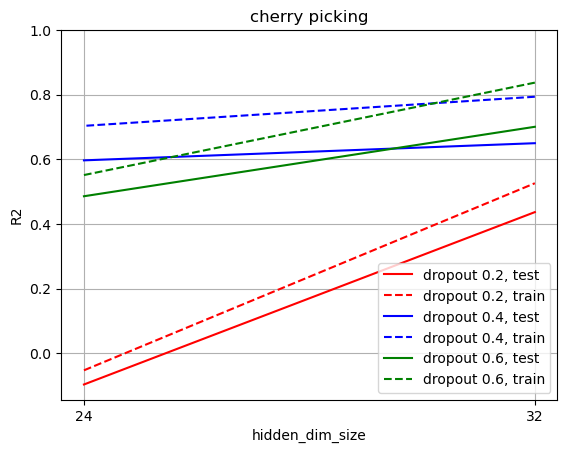

In [49]:
sub_df = df[df.pick == 'cherry']
sub_df

sub_df1 = sub_df[sub_df.dropout == 0.2]
plt.plot(sub_df1.hidden_dim_size, sub_df1.qual_obs_coefdet, color='red')
plt.plot(sub_df1.hidden_dim_size, sub_df1.train_obs_coefdet, color='red', linestyle='--')

sub_df1 = sub_df[sub_df.dropout == 0.4]
plt.plot(sub_df1.hidden_dim_size, sub_df1.qual_obs_coefdet,color='blue')
plt.plot(sub_df1.hidden_dim_size, sub_df1.train_obs_coefdet,color='blue', linestyle='--')

sub_df1 = sub_df[sub_df.dropout == 0.6]
plt.plot(sub_df1.hidden_dim_size, sub_df1.qual_obs_coefdet,color='green')
plt.plot(sub_df1.hidden_dim_size, sub_df1.train_obs_coefdet,color='green', linestyle='--')

plt.title('cherry picking')
plt.xlabel('hidden_dim_size')
plt.xticks([24, 32])
plt.yticks([i * 0.2 for i in range(6)])
plt.ylabel('R2')
plt.legend(['dropout 0.2, test', 'dropout 0.2, train', 'dropout 0.4, test', 'dropout 0.4, train','dropout 0.6, test','dropout 0.6, train'])
plt.grid()

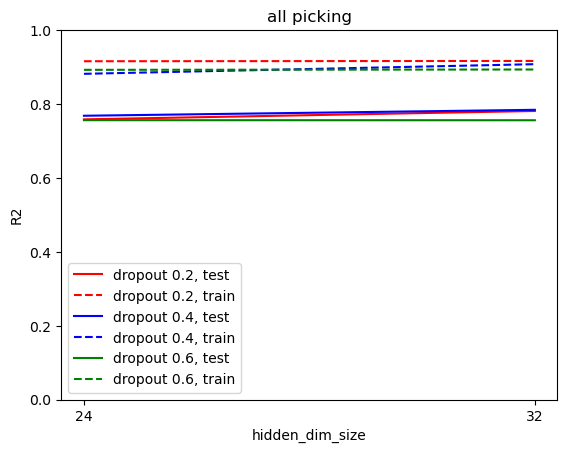

In [33]:
sub_df = df[df.pick == 'all']
sub_df = sub_df[sub_df.hidden_dim_size.isin([24, 32])]

sub_df1 = sub_df[sub_df.dropout == 0.2]
plt.plot(sub_df1.hidden_dim_size, sub_df1.qual_obs_corrcoef, color='red')
plt.plot(sub_df1.hidden_dim_size, sub_df1.train_obs_corrcoef, color='red', linestyle='--')

sub_df1 = sub_df[sub_df.dropout == 0.4]
plt.plot(sub_df1.hidden_dim_size, sub_df1.qual_obs_corrcoef,color='blue')
plt.plot(sub_df1.hidden_dim_size, sub_df1.train_obs_corrcoef,color='blue', linestyle='--')

sub_df1 = sub_df[sub_df.dropout == 0.6]
plt.plot(sub_df1.hidden_dim_size, sub_df1.qual_obs_corrcoef,color='green')
plt.plot(sub_df1.hidden_dim_size, sub_df1.train_obs_corrcoef,color='green', linestyle='--')

plt.title('all picking')
plt.xlabel('hidden_dim_size')
plt.xticks([24, 32])
plt.yticks([i * 0.2 for i in range(6)])
plt.ylabel('R2')
plt.legend(['dropout 0.2, test', 'dropout 0.2, train', 'dropout 0.4, test', 'dropout 0.4, train','dropout 0.6, test','dropout 0.6, train'])

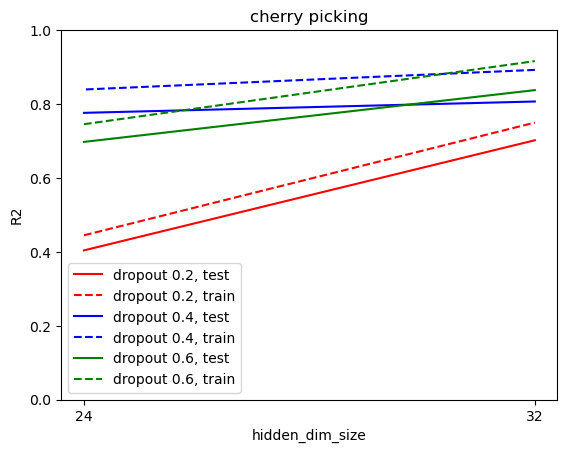

In [35]:
sub_df = df[df.pick == 'cherry']
sub_df = sub_df[sub_df.hidden_dim_size.isin([24, 32])]

sub_df1 = sub_df[sub_df.dropout == 0.2]
plt.plot(sub_df1.hidden_dim_size, sub_df1.qual_obs_corrcoef, color='red')
plt.plot(sub_df1.hidden_dim_size, sub_df1.train_obs_corrcoef, color='red', linestyle='--')

sub_df1 = sub_df[sub_df.dropout == 0.4]
plt.plot(sub_df1.hidden_dim_size, sub_df1.qual_obs_corrcoef,color='blue')
plt.plot(sub_df1.hidden_dim_size, sub_df1.train_obs_corrcoef,color='blue', linestyle='--')

sub_df1 = sub_df[sub_df.dropout == 0.6]
plt.plot(sub_df1.hidden_dim_size, sub_df1.qual_obs_corrcoef,color='green')
plt.plot(sub_df1.hidden_dim_size, sub_df1.train_obs_corrcoef,color='green', linestyle='--')

plt.title('cherry picking')
plt.xlabel('hidden_dim_size')
plt.xticks([24, 32])
plt.yticks([i * 0.2 for i in range(6)])
plt.ylabel('R2')
plt.legend(['dropout 0.2, test', 'dropout 0.2, train', 'dropout 0.4, test', 'dropout 0.4, train','dropout 0.6, test','dropout 0.6, train'])